###Import Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')


### Load The Dataset

In [ ]:
tracks = pd.read_csv('Spotify-2000.csv')
tracks.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


### Display Basic Information About The DataSet

In [ ]:

tracks.info()
tracks.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

(1994, 15)

In [ ]:
print(tracks.describe())

             Index         Year  Beats Per Minute (BPM)       Energy  \
count  1994.000000  1994.000000             1994.000000  1994.000000   
mean    997.500000  1992.992979              120.215647    59.679539   
std     575.762538    16.116048               28.028096    22.154322   
min       1.000000  1956.000000               37.000000     3.000000   
25%     499.250000  1979.000000               99.000000    42.000000   
50%     997.500000  1993.000000              119.000000    61.000000   
75%    1495.750000  2007.000000              136.000000    78.000000   
max    1994.000000  2019.000000              206.000000   100.000000   

       Danceability  Loudness (dB)     Liveness      Valence  Acousticness  \
count   1994.000000    1994.000000  1994.000000  1994.000000   1994.000000   
mean      53.238215      -9.008526    19.012036    49.408726     28.858074   
std       15.351507       3.647876    16.727378    24.858212     29.011986   
min       10.000000     -27.000000     

## Data Cleaning

### Check For Missing Values

In [ ]:

tracks.isnull().sum()

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

### Remove missing values(if any)

In [ ]:
tracks_cleaned=tracks.dropna()

### Remove columns that won't be used

In [ ]:
tracks = tracks.drop(['Index'], axis = 1)


### Checking Number of Unique Values

In [ ]:
tracks['Title'].nunique(), tracks.shape


(1958, (1994, 14))

### Checking For Duplicate values

In [ ]:
duplicates = tracks[tracks.duplicated(subset='Title', keep=False)]
print(duplicates[['Title']])

                 Title
0              Sunrise
54                Hurt
116       Feeling Good
138               Home
226                One
...                ...
1890           Suzanne
1917  Somebody to Love
1967        Proud Mary
1980        Summertime
1988        Summertime

[69 rows x 1 columns]


### Removing Dupilcate Values

In [ ]:
tracks = tracks.sort_values(by=['Popularity'], ascending=False)
tracks.drop_duplicates(subset=['Title'], keep='first', inplace=True)


## Plotting

### Plotting t-SNE Visualization

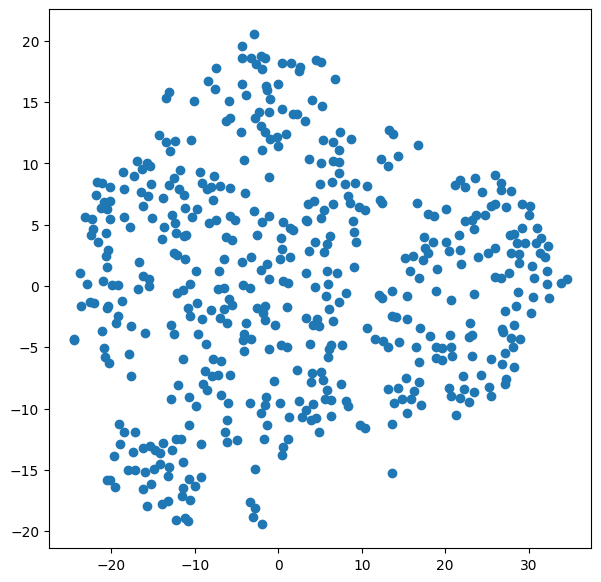

In [ ]:
numerical_data = tracks.select_dtypes(include=['number'])
model = TSNE(n_components = 2, random_state = 0)
tsne_data = model.fit_transform(numerical_data.head(500))
plt.figure(figsize = (7, 7))
plt.scatter(tsne_data[:,0], tsne_data[:,1])
plt.show()

### Visualizing Number of Songs Released Each Year

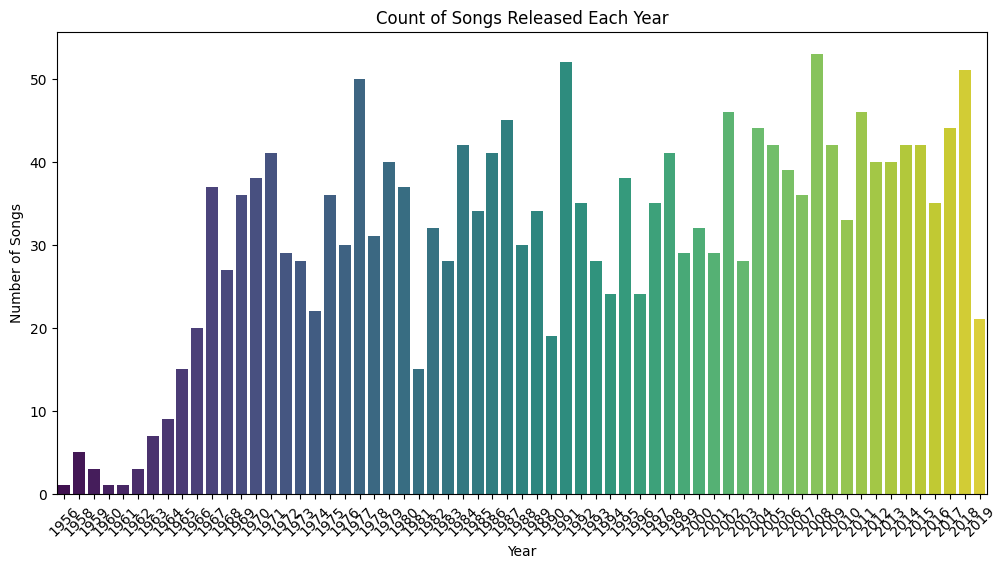

In [ ]:
songs_per_year = tracks['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sb.countplot(x='Year', data=tracks, palette='viridis')
plt.title('Count of Songs Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.show()

### Plotting Numerical Column Distributions



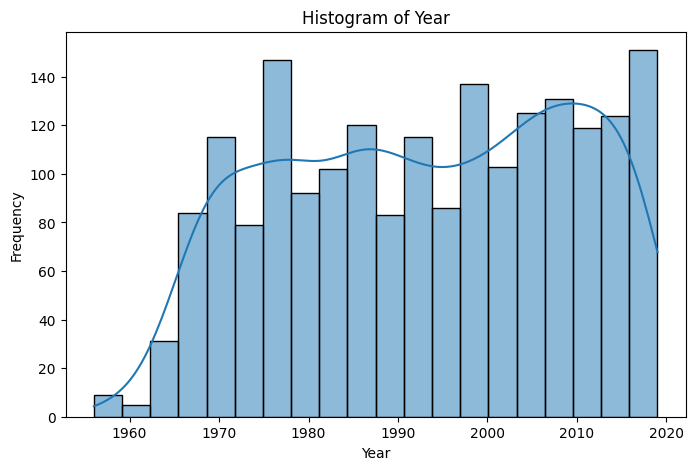

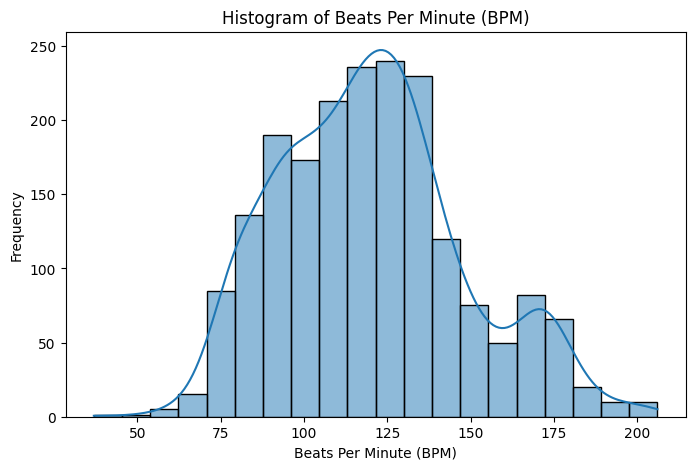

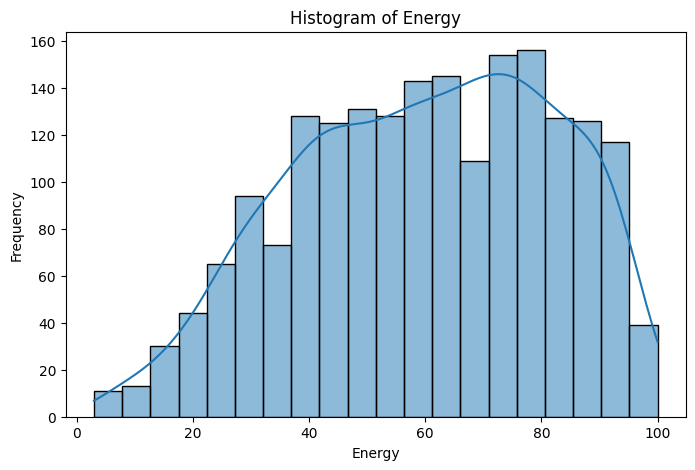

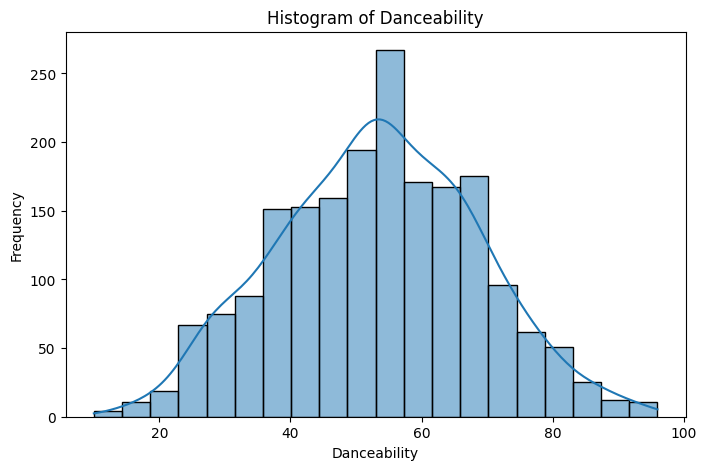

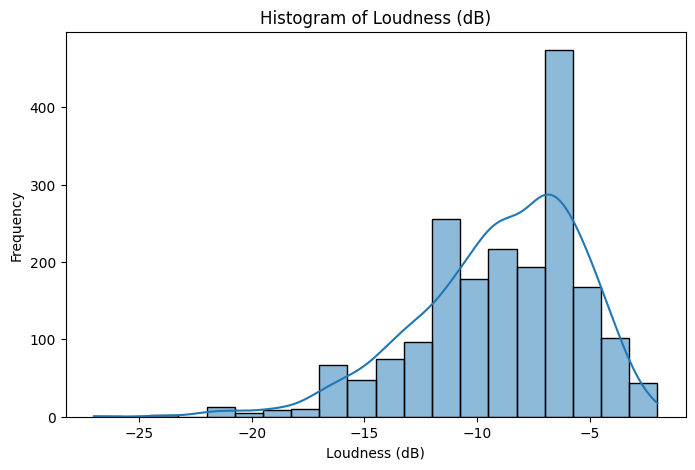

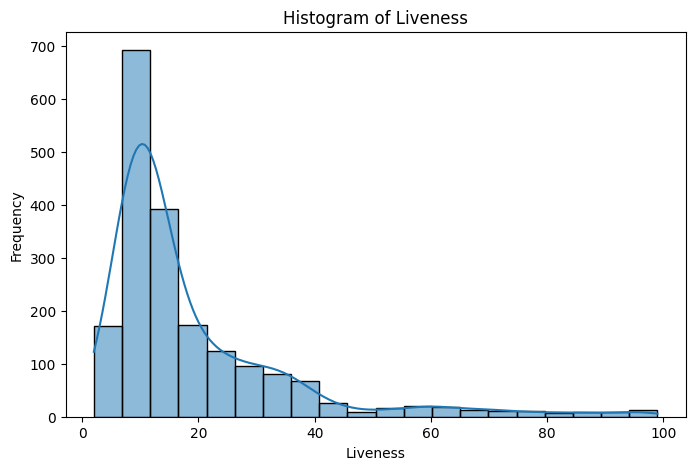

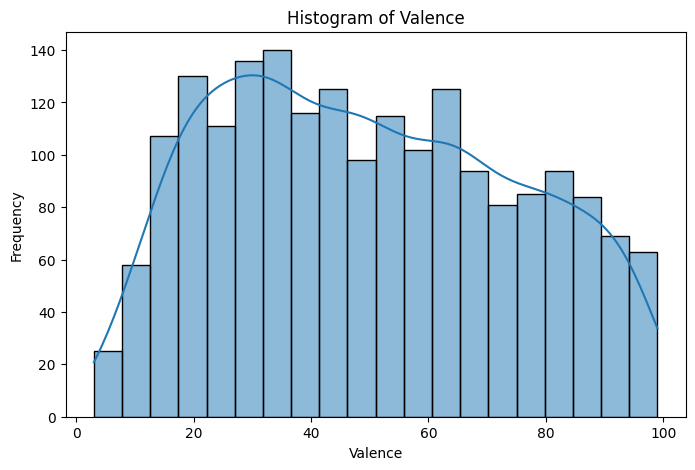

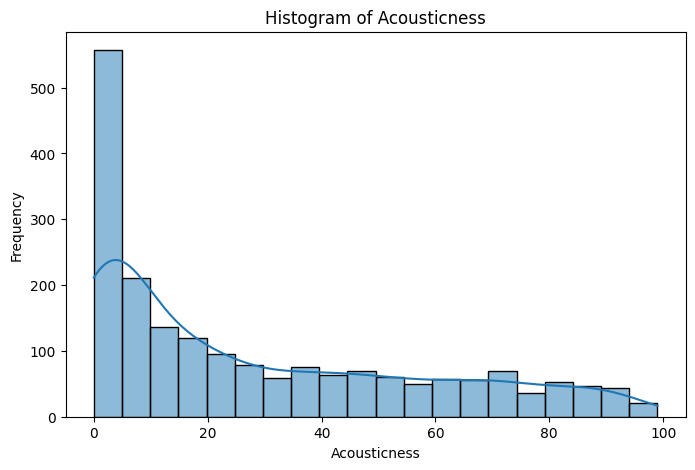

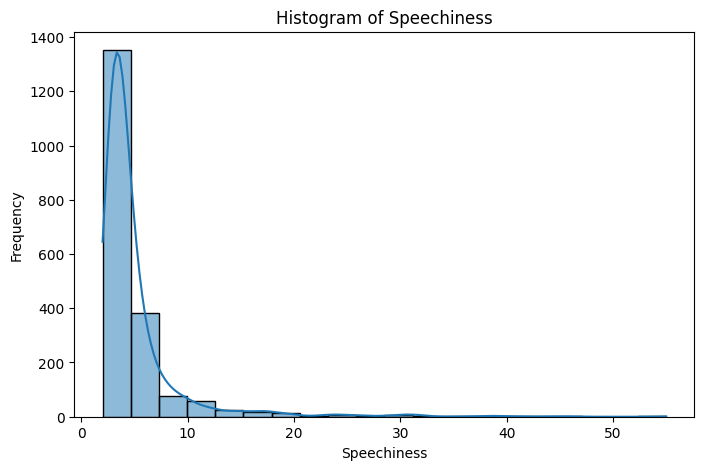

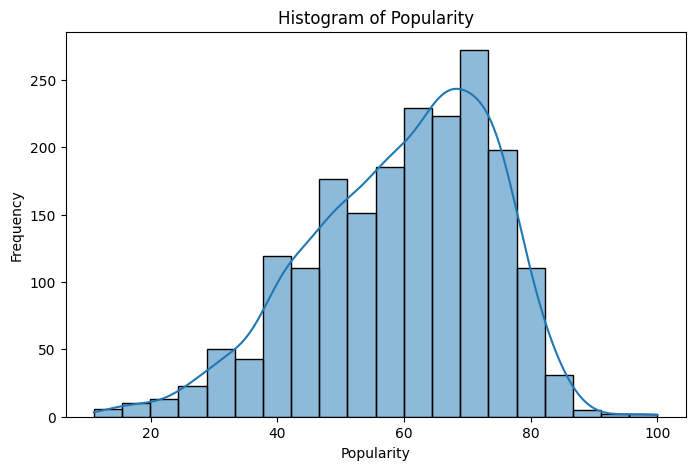

In [ ]:
numerical_columns = tracks.select_dtypes(include=['number']).columns

for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sb.histplot(data=tracks, x=column, bins=20, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## Data Preprocessing

### Feature Engineering

In [ ]:
def generate_ratings(Popularity):
    return np.round((Popularity / max(tracks['Popularity'])) * 5, 2)

tracks['rating'] = tracks['Popularity'].apply(generate_ratings)
print(tracks[['Title', 'Artist', 'Popularity', 'rating']])

                                Title                  Artist  Popularity  \
793                      Dance Monkey             Tones and I         100   
787                          Memories                Maroon 5          98   
786                           bad guy           Billie Eilish          95   
1641  All I Want for Christmas Is You            Mariah Carey          95   
688                          Believer         Imagine Dragons          88   
...                               ...                     ...         ...   
605                   Het Dorp - Live           Wim Sonneveld          15   
411                  Peter Gunn Theme  Emerson, Lake & Palmer          14   
624               Three Days In A Row                   Anouk          13   
773                  Hou Vol Hou Vast                    BLØF          12   
1793                        Sacrifice                   Anouk          11   

      rating  
793     5.00  
787     4.90  
786     4.75  
1641    4.75  


###Split the data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
tracks.dropna(inplace=True)
tracks.drop_duplicates(inplace=True)
train_data, test_data = train_test_split(tracks, test_size=0.2, random_state=42)

### Text Data Vectorization

In [ ]:
%%capture
song_vectorizer = CountVectorizer()
song_vectorizer.fit(tracks['Top Genre'])
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data['Top Genre'])
X_test = vectorizer.transform(test_data['Top Genre'])



In [ ]:
tracks = tracks.sort_values(by=['Popularity'], ascending=False)


## Building a recommendation system

### Song Similarity Calculation

In [ ]:
def get_similarities(song_name, data):


    text_array1 = song_vectorizer.transform(data[data['Title']==song_name]['Top Genre']).toarray()
    num_array1 = data[data['Title']==song_name].select_dtypes(include=np.number).to_numpy()

    sim = []
    for idx, row in data.iterrows():
      name = row['Title']


      text_array2 = song_vectorizer.transform(data[data['Title']==name]['Top Genre']).toarray()
      num_array2 = data[data['Title']==name].select_dtypes(include=np.number).to_numpy()


      text_sim = cosine_similarity(text_array1, text_array2)[0][0]
      num_sim = cosine_similarity(num_array1, num_array2)[0][0]
      sim.append(text_sim + num_sim)

    return sim


### Song Recommendation Function

In [ ]:
def recommend_songs(song_name, data=tracks):

    if tracks[tracks['Title'] == song_name].shape[0] == 0:
      print('This song is either not so popular or you\
      have entered invalid_name.\n Some songs you may like:\n')

      for song in data.sample(n=5)['Title'].values:
           print(song)
      return

    data['similarity_factor'] = get_similarities(song_name, data)

    data.sort_values(by=['similarity_factor', 'Popularity'],
            ascending = [False, False],
            inplace=True)


    display(data[['Title', 'Artist']][2:7])


 ## Recommendations for a Given Input

In [ ]:
recommend_songs('Music')

,Title,Artist
1971,Scarlet Ribbons,The Cats
868,Storm And Thunder,Earth & Fire
109,Forever Autumn,Jeff Wayne
413,The Eve of the War,Jeff Wayne
1459,(Something Inside) So Strong,Labi Siffre


In [ ]:
recommend_songs('The Pretender')

,Title,Artist
1484,Epic,Faith No More
357,How You Remind Me,Nickelback
1583,Plush - 2017 Remaster,Stone Temple Pilots
1814,The Dolphin's Cry,Live
89,Times Like These,Foo Fighters


In [ ]:
recommend_songs('rose')

This song is either not so popular or you      have entered invalid_name.
 Some songs you may like:

Isn't It Time
Livin' On A Prayer
Green Eyes
On Top Of The World
Human Nature


## Evaluate The Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import precision_score
model = LinearRegression()
model.fit(X_train, train_data['rating'])

predicted_ratings = model.predict(X_test)

true_ratings = test_data['rating']

mae = mean_absolute_error(true_ratings, predicted_ratings)
mse = mean_squared_error(true_ratings, predicted_ratings)
rmse = np.sqrt(mse)
rating_threshold =1.37
ground_truth_labels = (true_ratings >= rating_threshold).astype(int)
binary_predictions = (predicted_ratings >= rating_threshold).astype(int)
precision = precision_score(ground_truth_labels, binary_predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Precision: {precision}')

Mean Absolute Error (MAE): 0.4795737750447214
Mean Squared Error (MSE): 0.3618399169673623
Root Mean Squared Error (RMSE): 0.6015313100474174
Precision: 0.9770408163265306
